Kütüphaneler

In [20]:
import tensorflow as tf
import numpy as np
import pylab as pl 
from keras import backend as K 
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations
from keras.preprocessing.image import ImageDataGenerator


Veri Yükleme

In [21]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="validation", batch_size=2)


Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


Veri Arttırma

In [22]:
def visualize(orginal, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title("Orginal Image")
    plt.imshow(orginal)

    plt.subplot(1,2,2)
    plt.title("Modified")
    plt.imshow(augmented)

In [23]:
image,_ = test_datagen.next()

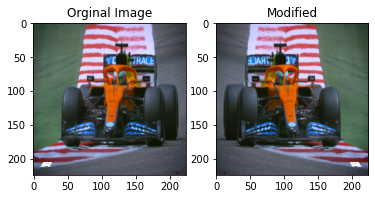

In [24]:
flipped = tf.image.flip_left_right(image)
visualize(image[0], flipped[0])

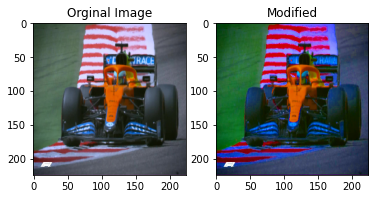

In [25]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image[0], saturated[0])

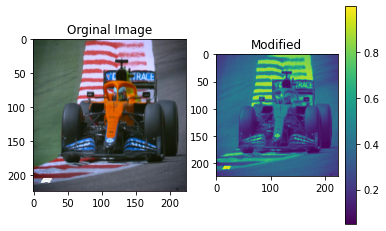

In [26]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image[0], tf.squeeze(grayscaled)[0])
_ = plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


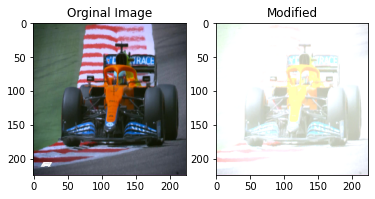

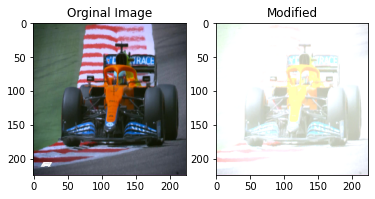

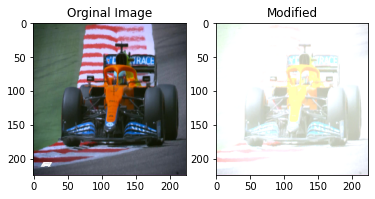

In [27]:
for i in range(3):
    seed = (1, 0)
    stateless_random_brightness = tf.image.stateless_random_brightness(
        image, max_delta=0.95, seed=seed
    )

    visualize(image[0], stateless_random_brightness[0])
    

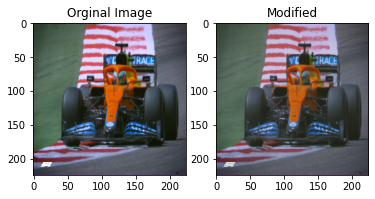

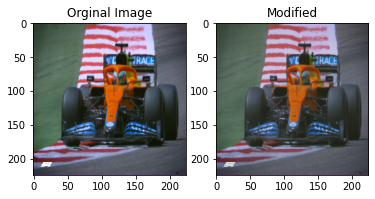

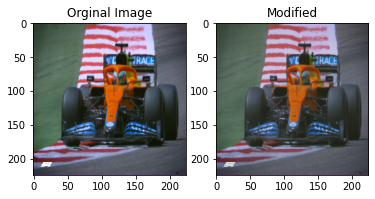

In [28]:
for i in range(3):
    seed = (1, 0)
    stateless_random_contrast = tf.image.stateless_random_contrast(
        image, lower=0.1,upper=0.9, seed=seed
    )

    visualize(image[0], stateless_random_contrast[0])
    

Model Oluşumu

In [29]:
model = Sequential()

model.add(layers.Conv2D(filters=4, activation="elu", kernel_size=(5,5), input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8, activation="elu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16, activation="elu", kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32, activation="elu", kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(17, activation="elu"))
model.add(layers.Dense(43, activation="elu"))
model.add(layers.Dense(73, activation="elu"))
model.add(layers.Dense(73, activation="elu"))
model.add(layers.Dense(43, activation="elu"))
model.add(layers.Dense(17, activation="elu"))
model.add(layers.Dense(7 , activation="elu"))
model.add(layers.Dense(4 , activation="softmax"))


Model Eğitimi

In [30]:
optizimer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [31]:
model.compile(optimizer=optizimer, loss=loss, metrics=["accuracy"])

In [32]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 8s 58ms/step - loss: 1.4124 - accuracy: 0.2698 - val_loss: 1.5183 - val_accuracy: 0.2500
Epoch 2/5
126/126 [==============================] - 7s 53ms/step - loss: 1.2835 - accuracy: 0.3849 - val_loss: 1.6712 - val_accuracy: 0.1429
Epoch 3/5
126/126 [==============================] - 7s 54ms/step - loss: 0.8756 - accuracy: 0.6746 - val_loss: 1.6840 - val_accuracy: 0.3571
Epoch 4/5
126/126 [==============================] - 7s 53ms/step - loss: 0.4607 - accuracy: 0.8690 - val_loss: 1.7952 - val_accuracy: 0.4643
Epoch 5/5
126/126 [==============================] - 7s 53ms/step - loss: 0.2317 - accuracy: 0.9603 - val_loss: 2.0122 - val_accuracy: 0.4286


In [33]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

epoch = range(1, len(acc)+1)

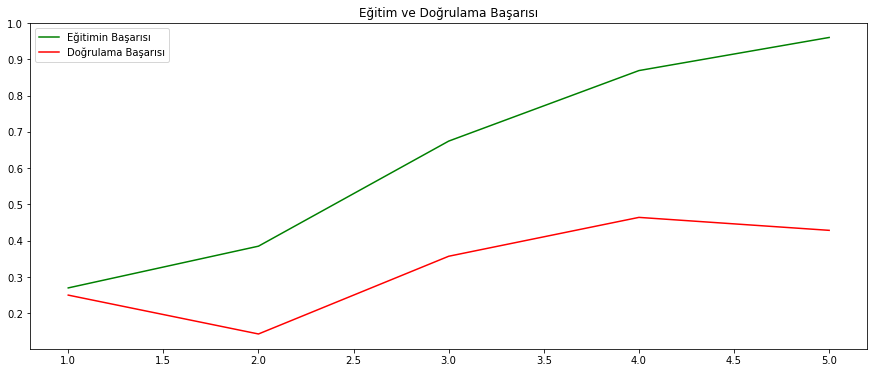

In [34]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc, label=("Eğitimin Başarısı"), color="g")
plt.plot(epoch, val_acc, label=("Doğrulama Başarısı"), color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

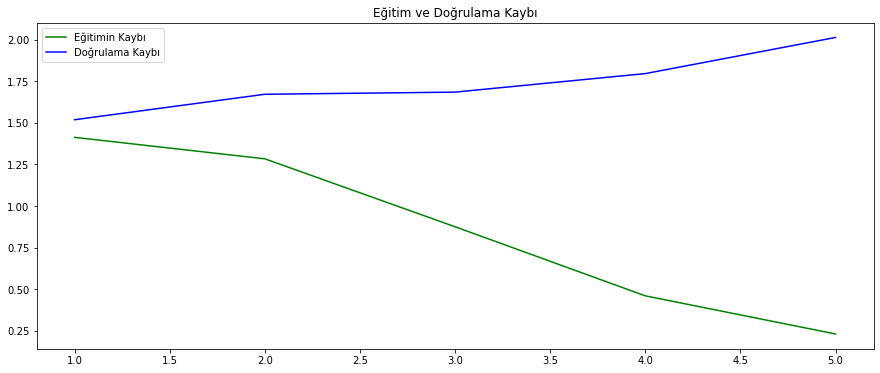

In [35]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc_loss, label=("Eğitimin Kaybı"), color= "g")
plt.plot(epoch, val_loss, label=("Doğrulama Kaybı"), color = "b")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()